In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']= 150  #resolution

In [2]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , xlabel = None, formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    if xlabel != None:
        ax.set_xlabel(xlabel)
    plt.show()

In [5]:
time_col = 'date'

attributes = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


df=pd.read_csv(r'../../data/datatraining.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
print(df.date)
mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [thu1,fri1,sat1,sun1,mon1] #I dont want incompleted days, so wednesday and tuesday are excluded


df=pd.read_csv(r'../../data/datatest2.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
print(df.date)
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [thu2,fri2,sat2,sun2,mon2] #I dont want incompleted days, so wednesday and tuesday are excluded


1      2015-02-04 17:51:00
2      2015-02-04 17:51:59
3      2015-02-04 17:53:00
4      2015-02-04 17:54:00
5      2015-02-04 17:55:00
               ...        
8139   2015-02-10 09:29:00
8140   2015-02-10 09:29:59
8141   2015-02-10 09:30:59
8142   2015-02-10 09:32:00
8143   2015-02-10 09:33:00
Name: date, Length: 8143, dtype: datetime64[ns]
1      2015-02-11 14:48:00
2      2015-02-11 14:49:00
3      2015-02-11 14:50:00
4      2015-02-11 14:51:00
5      2015-02-11 14:51:59
               ...        
9748   2015-02-18 09:15:00
9749   2015-02-18 09:16:00
9750   2015-02-18 09:16:59
9751   2015-02-18 09:17:59
9752   2015-02-18 09:19:00
Name: date, Length: 9752, dtype: datetime64[ns]


C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


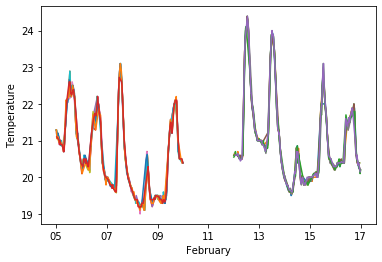

In [4]:
week_size = 144
week_list = [] 
week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


random.shuffle(week_list)
draw_list(week_list, 'Temperature', 15, time = time_col , xlabel = 'February', formatter = '%d')

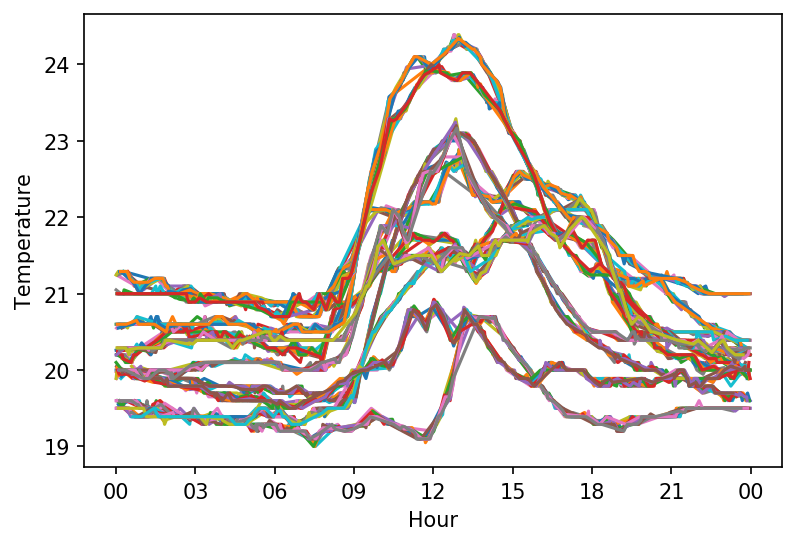

In [9]:
day_list = []
day_size = 120

day1_list=[]
for day in weekdays1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day1_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extra


day2_list = []
for day in weekdays2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day2_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


draw_list(day_list, 'Temperature', time = 'time', xlabel = 'Hour', formatter = '%H')

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


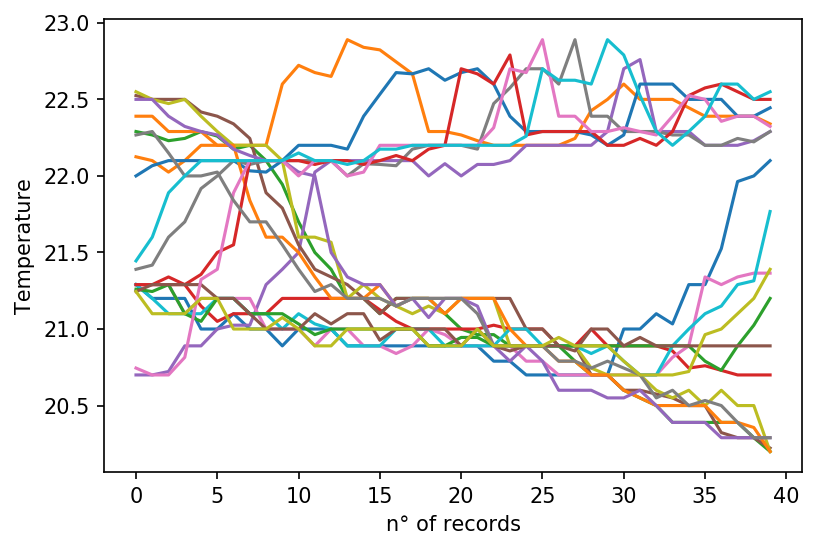

In [10]:
splits = 3 #night #morning #afternoon #evening 
part_size = day_size // splits
day_split = []

day1_split = []
for ts in day1_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day1_split.append(day_part)
    
day2_split = []
for ts in day2_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day2_split.append(day_part)

for day in day1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day2_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_split:
    day.reset_index(drop=True, inplace=True)    


    
draw_list(day_split,  'Temperature', 20, xlabel = 'n° of records')


In [11]:
day_list

[                    date  Temperature  Humidity  Light         CO2  \
 18   2015-02-05 00:17:59        21.29     25.20    0.0  463.000000   
 74   2015-02-05 01:14:00        21.20     25.29    0.0  449.333333   
 87   2015-02-05 01:27:00        21.20     25.20    0.0  443.000000   
 95   2015-02-05 01:34:59        21.20     25.10    0.0  442.000000   
 144  2015-02-05 02:23:59        21.00     24.89    0.0  443.000000   
 ...                  ...          ...       ...    ...         ...   
 1406 2015-02-05 23:25:59        20.39     21.29    0.0  451.000000   
 1408 2015-02-05 23:28:00        20.39     21.29    0.0  450.000000   
 1410 2015-02-05 23:30:00        20.39     21.29    0.0  445.000000   
 1425 2015-02-05 23:44:59        20.29     21.29    0.0  447.000000   
 1438 2015-02-05 23:57:59        20.20     21.20    0.0  443.500000   
 
       HumidityRatio  Occupancy                time  
 18         0.003942          0 1900-01-01 00:17:59  
 74         0.003934          0 1900-0

In [202]:
ts_list = []
for temp in week_list:
    ts = temp['Humidity'].copy()
    ts.reset_index(drop=True, inplace=True)
    ts_list.append(ts)
    
ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size, 1))
    
ts_array = np.array(ts_array)

In [203]:
ts_list

[0      26.245
 1      26.295
 2      26.300
 3      25.390
 4      24.495
         ...  
 139    30.390
 140    30.390
 141    30.200
 142    30.245
 143    30.200
 Name: Humidity, Length: 144, dtype: float64, 0      27.166667
 1      26.000000
 2      26.293333
 3      25.500000
 4      24.663333
          ...    
 139    30.290000
 140    30.290000
 141    30.200000
 142    30.050000
 143    30.166667
 Name: Humidity, Length: 144, dtype: float64, 0      27.390
 1      26.145
 2      26.090
 3      26.500
 4      25.100
         ...  
 139    30.175
 140    30.290
 141    30.390
 142    30.100
 143    30.100
 Name: Humidity, Length: 144, dtype: float64, 0      25.500000
 1      25.200000
 2      24.426667
 3      24.290000
 4      23.500000
          ...    
 139    35.090000
 140    33.790000
 141    33.790000
 142    33.590000
 143    33.500000
 Name: Humidity, Length: 144, dtype: float64, 0      25.200000
 1      25.200000
 2      24.945000
 3      24.856667
 4      24.890000
    

In [204]:
def tsdist(ts1, ts2):
    dist = math.sqrt(sum([(ts1[i] - ts2[i])**2 for i in range(len(ts1))]))
    return dist

In [205]:
print(tsdist(ts_list[1],ts_list[2]))

36.76304498859328


In [206]:
def cluster_init (ts_list, k = 3):
    centers = []
    while len(centers) < k:
        centers.append(random.randint(0,len(ts_list)))
    return centers

In [207]:
def new_labels(ts_list,centers, k=3):
    labels = []
    for ts in ts_list:
        mindist = tsdist(ts,ts_list[centers[0]])
        label = 0
        for i in range(k):
            if tsdist(ts, ts_list[centers[i]]) < mindist:
                mindist = tsdist(ts, ts_list[centers[i]]) 
                label = i
        labels.append(label)
    print(labels)
    return labels

In [208]:
def new_centers(ts_list, labels, centers, k=3):
    for i in range(k):
        min_distance = 0
        for index in range(len(ts_list)):
            if labels[index] == i: 
                min_distance += tsdist(ts_list[centers[i]],ts_list[index])
        j = 0
        for ts in ts_list:
            j+=1
            distance = sum([tsdist(ts,ts_list[index]) for index in range(len(ts_list)) if labels[index] == i])
            if distance < min_distance: 
                min_distance = distance
                newcenter = j
        centers[i] = newcenter
    print(centers)
    return centers
        
    


In [216]:
def tskmeans(ts_list, k = 3):
    centers = cluster_init (ts_list, k)
    print(centers)
    labels = new_labels(ts_list,centers, k)
    print(labels)
    newlabels = []
    while(labels != newlabels):
        if newlabels != []: labels = newlabels
        centers = new_centers(ts_list, labels, centers, k)
        newlabels = new_labels(ts_list,centers, k)
    return centers, labels  

In [217]:

centers, labels  = tskmeans(ts_list, 2)

[61, 73]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[49, 45]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
[37, 49]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

KeyboardInterrupt: 

In [ ]:
centers = cluster_init (ts_list, 3)
print(centers)
labels = new_labels(ts_list,centers, 3)

print(labels)
#   while(newcenters != centers):
 #       centers = newcenters.copy()
  #      newcenters = new_c

In [136]:
ts_list[36]

0      29.890000
1      30.100000
2      30.267500
3      30.290000
4      30.290000
         ...    
115    27.426667
116    27.390000
117    27.290000
118    27.100000
119    27.100000
Name: Humidity, Length: 120, dtype: float64

In [213]:
centers = [27, 56]
labels = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]

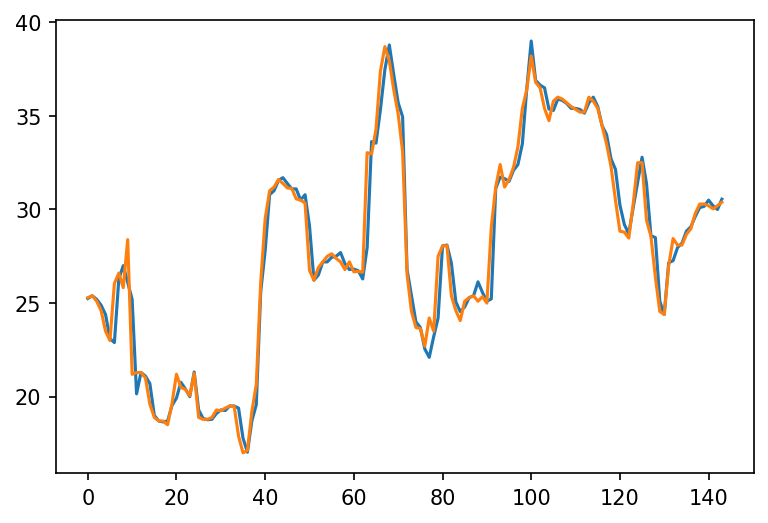

col_0,0,1
row_0,,
0,50,0
1,0,50


In [215]:


plt.plot(ts_array[centers].reshape(ts_array.shape[1],2))
plt.show()
pd.crosstab(pd.Series(labels),pd.Series(labels))

In [114]:
ts_list[0]


0      25.20
1      25.29
2      25.20
3      25.10
4      24.89
       ...  
115    21.29
116    21.29
117    21.29
118    21.29
119    21.20
Name: Humidity, Length: 120, dtype: float64

In [145]:
ts = ts_list[7].copy()

In [155]:
ts_list.index(ts)

AttributeError: 'list' object has no attribute 'all'